### Pytorch Workflow
Let's examine an end-to-end Pytorch workflow

In [1]:
import torch
from torch import nn  # nn contains all of the Pytorch's building blocks for neural networks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
torch.__version__

'2.4.1'

In [2]:
what_were_covering = { 1: "data (prepare and load)",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predictions and evaluating the model (inference)",
                       5: "saving and loading model",
                       6: "putting it all together"
                     }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading model',
 6: 'putting it all together'}

### Data (preparing and loading)
Data can be almost anything... in Machine Learning <br />
- Excel spreadsheet
- Images of any kind
- Videos (YouTube has a lot of data)
- Audio like songs or podcasts
- DNA
- Text<br />


Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula <br />
We'll use linear regression formula to make a straight line with *known* **parameters** 

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting Data into training and test sets (one of the most important concepts in machine learning in general)
Let's create a train and test set for our data

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we visualize our Data? <br />
Here is where the Data Exploration comes into picture <br />
"Visualize, Outline and Code"!

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=6, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=6, label="Test Data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions 
        plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

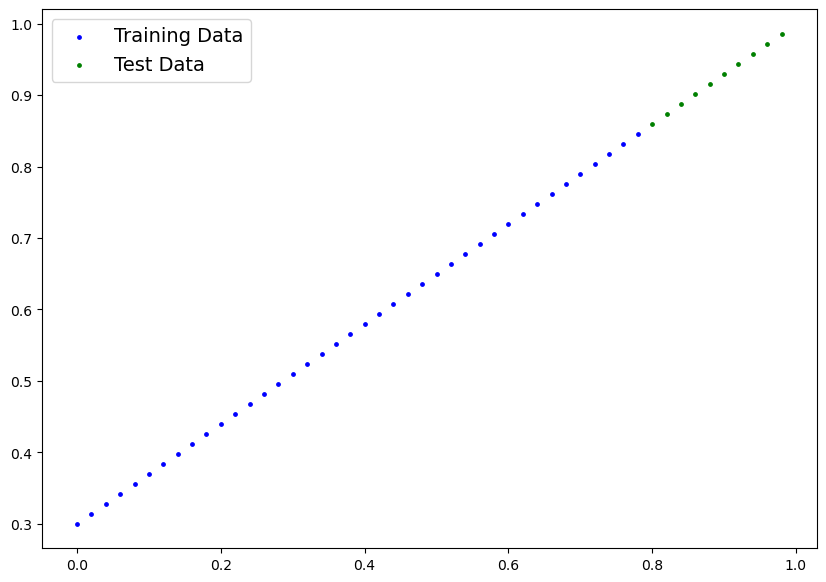

In [6]:
plot_predictions()

### Building a model 
Our first Pytorch model! <br />
This is very exciting... let's do it! <br />
What our model does:
- Start with random values of *weights* and *bias*
- Look at training data and adjust the random values of *weights* and *bias* to better represent (or get closer to) the ideal values (the weights and bias we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [7]:
# Create a linear regression class
class LinearRegressionModel(nn.Module):  # almost everything in Pytorch inherits from nn.Module 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,  # start with random weights and try to adjust to ideal weights
                                                requires_grad=True,  # can this parameter be updated via gradient descent? True
                                                dtype=torch.float))  # Pytorch loves the datatype torch.float32
        self.bias = nn.Parameter(torch.randn(1,  # start with a random bias and try to adjust to the ideal bias
                                             requires_grad=True,  # can this parameter be updated via gradient descent? True
                                             dtype=torch.float))  # Pytorch loves the datatype torch.float32
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # "x" is the input data
        return self.weights * x + self.bias  # this is the linear regression formula

### Pytorch model building essentials
* `torch.nn` - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a Pytorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if we subclass it, we must overwrite the **forward()** method
* `torch.optim` - this is where the optimizers in Pytorch live, they will help with gradient descent
* `def forward():` - All `nn.Module` subclasses require us to overwrite this method. It defines what happens in the forward computation

### Checking the contents of our Pytorch model
Now we've created our first Pytorch model, let's see what's inside it... <br />
So we can check our model parameters or what's inside the model using `.parameters()`.

In [30]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of the nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
# model_0, model_0.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [31]:
# List named parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test` <br />
When we pass data through our model, it's going to run it through the `forward()` method

In [32]:
# Make predictions with the model
# with torch.inference_mode():
#     y_pred = model_0(X_test)

# We can also do something similar with torch.no_grad(), however, inference_mode() is preferred
with torch.no_grad():
    y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [33]:
# Calculating the loss MSE
mse = (y_test - y_pred) ** 2
sum = 0
for item in mse.squeeze():
    sum += item
print(f"The mean squared error is {sum:.2f}")

The mean squared error is 2.45


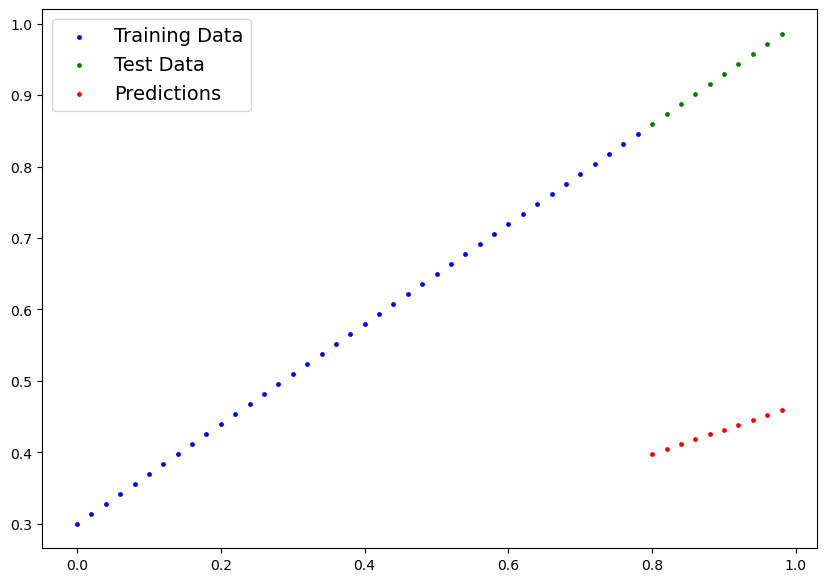

In [34]:
plot_predictions(predictions=y_pred)

### Train model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters. <br />
Or in other words from a poor representation of the data to a better representation of the data. <br />
One way to measure how poor or how wrong our model's predictions are is to use a loss function. <br />
* Note: Loss function may also be called as cost function or criterion in different areas. For our case, we are going to refer to it as loss function <br />
Things we need to train our model: <br />
* **Loss Function:** A function to measure how wrong our model's predictions are to the ideal outputs. Lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weight and bias in our case) to improve the loss function.
  - Inside the optimizer we'll often have to set up two parameters:
    1. `params` - the model parameters we want to optimize, for example `params=model_0.parameters()`
    2. `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes) <br />

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [35]:
# Set up a loss function
loss_fn = nn.L1Loss()

# NOTE: Before we had a very small lr=0.001 so it was not updating the weight and bias and it seemed like the model was not learning, so we put lr=0.01
# Set up an optimizer (stochastic/random gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  # learning rate = possibly the most important hyperparameter 

**Q:** Which loss function should we use? <br />
**A:** This will be problem specific. But with experience we'll get an idea of what works and what doesn't work with particular problem set <br />
For example, in a regression problem like ours, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice. <br />
But for a classification problem like classifying whether a photo is of a dog or a cat, we'll likely need a loss function like `nn.BCELoss()` (Binary Cross Entropy Loss)

### Building a training (and a testing) loop in Pytorch
A couple of things with need in a training loop:
1. Loop through the data:
2. Forward pass (this involves data moving through our model's `forward()` methods) to make predictions on data - also called as forward propagation
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [36]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Tracking experiments (track different values to check our model's progress)
epoch_count = []
loss_values = []
test_loss_values = []

# Training Loop

# 1. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode (this is the default state of a model)
    model_0.train()  # train mode in Pytorch sets all parameters that require gradients to require gradients

    # 2. Forward pass
    # We train our model on training data
    y_pred = model_0(X_train)

    # 3. Calculate the loss between predicted labels of training data and actual training set labels (how different are the model's predictions to the true values)
    loss = loss_fn(y_pred, y_train)

    # 4. optimizer zero grad - zero the gradients of the optimizer (they accumulate by default)
    optimizer.zero_grad()

    # 5. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 6. Step the optimizer (perform gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 4. for the next iteration of the loop
    
    model_0.eval()  # turns off different settings in the model not need for evaluating/testing (dropout/batch norm layers)
    with torch.inference_mode():  # turns off gradient tracking and a couple of more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    
        # Print out model.stat_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

**NOTE:** As our `loss_values`, `epoch_count` and `test_loss_values` are on Pytorch (they are Pytorch tensors) we need to convert them into Numpy arrays to plot the loss curve using them

In [44]:
np_epoch_count = torch.tensor(epoch_count).cpu().type(torch.float64).numpy()
np_loss_values = torch.tensor(loss_values).cpu().type(torch.float64).numpy()
np_test_loss_values = torch.tensor(test_loss_values).cpu().type(torch.float64).numpy()

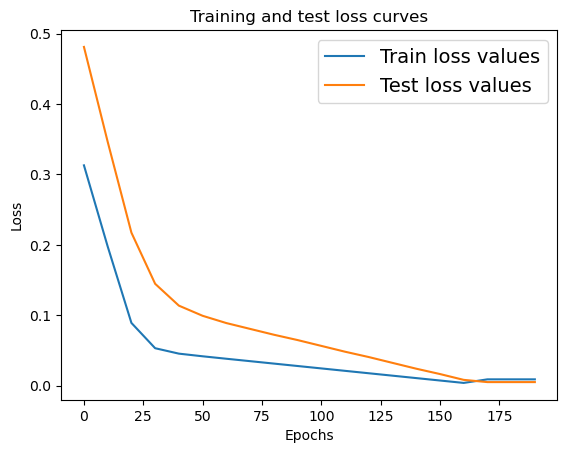

In [46]:
# Plot the loss curves 
plt.plot(np_epoch_count, np_loss_values, label="Train loss values")
plt.plot(np_epoch_count, np_test_loss_values, label="Test loss values")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(prop={"size":14})
plt.show()

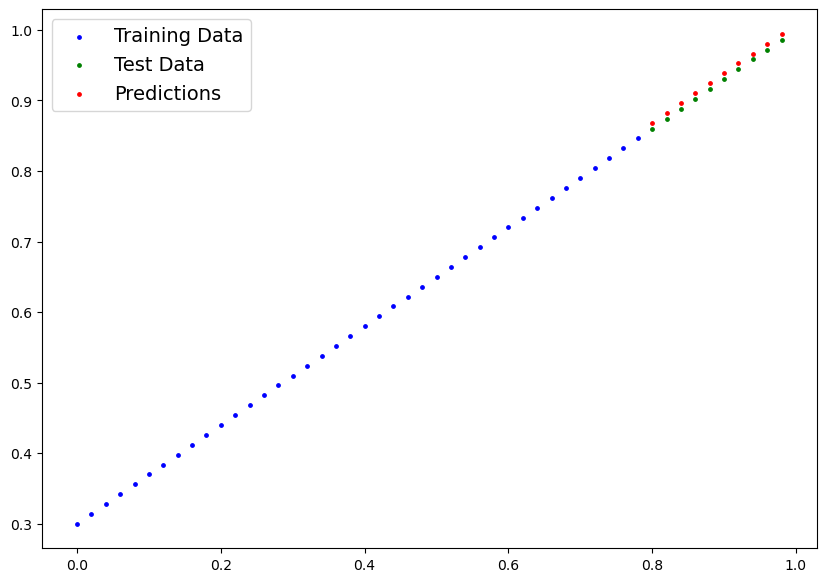

In [39]:
plot_predictions(predictions=y_pred_new)